### Preparation& Clean Data

#### 1.Import relevant libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns

#### 2.Oveview the dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/01-ufc-fight/matches.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [8]:
# Change data of 'date' columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.year

In [9]:
df = df.round(1)

#### 3.Data Preparation

##### Convert data frame by match => data frame by fighter for analysis

In [10]:
# Create a data frame with the BLUE fighters
df2 = df.drop(list(df)[76:-2],axis=1)
df2.drop(['R_age','R_fighter'],axis=1, inplace=True)
df2.columns = df2.columns.str.replace('B_', '')

In [11]:
df2.head()

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Marlon Moraes,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,...,0.0,2.0,1.0,0.0,4.0,Orthodox,167.6,170.2,135.0,31.0
1,Jessica Eye,Robert Madrigal,2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,...,1.0,0.0,0.0,1.0,4.0,Orthodox,167.6,167.6,125.0,32.0
2,Donald Cerrone,Dan Miragliotta,2019,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,...,7.0,10.0,6.0,0.0,23.0,Orthodox,185.4,185.4,155.0,36.0
3,Petr Yan,Kevin MacDonald,2019,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,...,2.0,2.0,0.0,0.0,4.0,Switch,170.2,170.2,135.0,26.0
4,Blagoy Ivanov,Dan Miragliotta,2019,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,Southpaw,180.3,185.4,250.0,32.0


In [12]:
# Create a data frame with the RED fighters
df3= df.drop(list(df)[9:76],axis=1)
df3.drop(['B_age','B_fighter'],axis=1, inplace=True)
df3.columns = df3.columns.str.replace('R_', '')

In [13]:
df3.head()

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Henry Cejudo,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,...,4.0,2.0,0.0,0.0,8.0,Orthodox,162.6,162.6,135.0,32.0
1,Valentina Shevchenko,Robert Madrigal,2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,2.0,...,2.0,0.0,2.0,0.0,5.0,Southpaw,165.1,167.6,125.0,31.0
2,Tony Ferguson,Dan Miragliotta,2019,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,11.0,...,3.0,3.0,6.0,1.0,14.0,Orthodox,180.3,193.0,155.0,35.0
3,Jimmie Rivera,Kevin MacDonald,2019,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,1.0,0.0,...,4.0,1.0,0.0,0.0,6.0,Orthodox,162.6,172.7,135.0,29.0
4,Tai Tuivasa,Dan Miragliotta,2019,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,1.0,0.0,...,1.0,2.0,0.0,0.0,3.0,Southpaw,188.0,190.5,264.0,26.0


In [14]:
# Check the columns between 2 data frames
df2.columns.values == df3.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [15]:
# Fix column names that don't match
df3.columns = df3.columns.str.replace('STatt', 'STR_att')
df3.columns = df3.columns.str.replace('STlanded', 'STR_landed')
df3.columns = df3.columns.str.replace('STpct', 'STR_pct')
df2.columns = df2.columns.str.replace('SUATT', 'SUB_ATT')

In [16]:
# Check the columns again
df2.columns.values == df3.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [17]:
# Concat the two tables above to get data frame according to fighter
Match_info = pd.concat([df2,df3])

In [18]:
Match_info.reset_index(inplace=True)

In [19]:
# Add Win_count columns to record Win rate
Match_info['index'] = 'Blue'
Match_info.loc[5144:,'index'] = 'Red'
Match_info['Win_Count'] = 0
Match_info.loc[Match_info['index'] == Match_info['Winner'],'Win_Count'] = 1
Match_info.loc[Match_info['Winner']== 'Draw','Win_Count'] = 0.5

In [20]:
Match_info.head()

,index,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,...,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,Win_Count
0,Blue,Marlon Moraes,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,1.0,0.0,4.0,Orthodox,167.6,170.2,135.0,31.0,0.0
1,Blue,Jessica Eye,Robert Madrigal,2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,0.0,1.0,4.0,Orthodox,167.6,167.6,125.0,32.0,0.0
2,Blue,Donald Cerrone,Dan Miragliotta,2019,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,10.0,6.0,0.0,23.0,Orthodox,185.4,185.4,155.0,36.0,0.0
3,Blue,Petr Yan,Kevin MacDonald,2019,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,2.0,0.0,0.0,4.0,Switch,170.2,170.2,135.0,26.0,1.0
4,Blue,Blagoy Ivanov,Dan Miragliotta,2019,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,0.0,0.0,0.0,1.0,Southpaw,180.3,185.4,250.0,32.0,1.0


Because the analysis target is male fighters => remove female fighters data

In [21]:
Match_info1= Match_info[~Match_info['weight_class'].isin(["Women's Bantamweight","Women's Strawweight","Women's Flyweight","Women's Featherweight"])]

##### Create a data frame to summarize the achievements by each fighter

In [22]:
# Create function to get fighter name and weight class
fighter_info = {}
def create_info(row):
  fighter = row['fighter']
  weight_class = row['weight_class']

  for i in fighter.split(','):
      if i not in fighter_info:
          fighter_info[i] = weight_class
      else: 
          pass
  return fighter_info

In [23]:
# Apply to each row of data frame
Match_info1.apply(create_info, axis=1)

0        {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
2        {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
3        {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
4        {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
6        {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
                               ...                        
10283    {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
10284    {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
10285    {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
10286    {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
10287    {'Marlon Moraes': 'Bantamweight', 'Donald Cerr...
Length: 9660, dtype: object

In [24]:
# dictionary containing the name and weight class of each fighter
fighter_info

{'Marlon Moraes': 'Bantamweight',
 'Donald Cerrone': 'Lightweight',
 'Petr Yan': 'Bantamweight',
 'Blagoy Ivanov': 'Heavyweight',
 'Pedro Munhoz': 'Bantamweight',
 'Calvin Kattar': 'Featherweight',
 'Darren Stewart': 'Middleweight',
 'Grigorii Popov': 'Bantamweight',
 'Anthony Smith': 'Light Heavyweight',
 'Aleksandar Rakic': 'Light Heavyweight',
 'Chris Fishgold': 'Featherweight',
 'Christos Giagos': 'Lightweight',
 'Sung Bin Jo': 'Featherweight',
 'Sergey Khandozhko': 'Welterweight',
 'Leonardo Santos': 'Lightweight',
 'Frank Camacho': 'Lightweight',
 'Devin Clark': 'Light Heavyweight',
 'Danilo Belluardo': 'Lightweight',
 'Kevin Lee': 'Welterweight',
 'Ian Heinisch': 'Middleweight',
 'Derrick Krantz': 'Welterweight',
 'Nik Lentz': 'Lightweight',
 'Austin Hubbard': 'Lightweight',
 'Charles Jourdain': 'Lightweight',
 'Michel Pereira': 'Welterweight',
 'Grant Dawson': 'Featherweight',
 'Ed Herman': 'Light Heavyweight',
 'Trevin Giles': 'Middleweight',
 'Julian Erosa': 'Featherweight',


In [25]:
# Creat new data frame from dict fighter_info
fighter_sum = pd.DataFrame({'fighter':fighter_info.keys(),'weight_class':fighter_info.values()})
fighter_sum = fighter_sum.sort_values('fighter')
fighter_sum.reindex()

,fighter,weight_class
1503,Aaron Brink,Heavyweight
847,Aaron Phillips,Featherweight
1085,Aaron Riley,Lightweight
1042,Aaron Rosa,Light Heavyweight
1100,Aaron Simpson,Middleweight
...,...,...
1599,Zane Frazier,Open Weight
75,Zelim Imadaev,Welterweight
863,Zhang Lipeng,Welterweight
435,Zu Anyanwu,Heavyweight


In [26]:
# Creat columns 'Total Win', 'Total Match','Win rate'
fighter_sum['Total Win'] = Match_info1.groupby('fighter')['Win_Count'].sum().values
fighter_sum['Total Match'] = Match_info1.groupby('fighter')['Win_Count'].count().values
fighter_sum['Total Match'] = fighter_sum['Total Match'].astype('float')
fighter_sum['Win rate'] = round(fighter_sum['Total Win']/fighter_sum['Total Match'],2)

In [27]:
# Creat columns 'Experience'
fighter_sum['Experience'] = 'Level 1'
fighter_sum.loc[fighter_sum['Total Match'] > 5,'Experience'] = 'Level 2'
fighter_sum.loc[fighter_sum['Total Match'] > 10,'Experience'] = 'Level 3'


In [28]:
# Creat columns 'Win Class'
fighter_sum['Win Class'] = 'Class 1'
fighter_sum.loc[fighter_sum['Win rate'] > 0.5,'Win Class'] = 'Class 2'


In [29]:
fighter_sum

,fighter,weight_class,Total Win,Total Match,Win rate,Experience,Win Class
1503,Aaron Brink,Heavyweight,0.0,1.0,0.00,Level 1,Class 1
847,Aaron Phillips,Featherweight,0.0,2.0,0.00,Level 1,Class 1
1085,Aaron Riley,Lightweight,3.0,9.0,0.33,Level 2,Class 1
1042,Aaron Rosa,Light Heavyweight,1.0,3.0,0.33,Level 1,Class 1
1100,Aaron Simpson,Middleweight,7.0,11.0,0.64,Level 3,Class 2
...,...,...,...,...,...,...,...
1599,Zane Frazier,Open Weight,0.0,2.0,0.00,Level 1,Class 1
75,Zelim Imadaev,Welterweight,0.0,1.0,0.00,Level 1,Class 1
863,Zhang Lipeng,Welterweight,2.0,4.0,0.50,Level 1,Class 1
435,Zu Anyanwu,Heavyweight,0.0,1.0,0.00,Level 1,Class 1


In [30]:
# Create a new data frame with fighters whose number of match is greater than 2
# Sample size is too small => win rate does not reflect accurately
fighter_sum1 = fighter_sum[fighter_sum['Total Match'] > 2 ]

In [31]:
fighter_sum1

,fighter,weight_class,Total Win,Total Match,Win rate,Experience,Win Class
1085,Aaron Riley,Lightweight,3.0,9.0,0.33,Level 2,Class 1
1042,Aaron Rosa,Light Heavyweight,1.0,3.0,0.33,Level 1,Class 1
1100,Aaron Simpson,Middleweight,7.0,11.0,0.64,Level 3,Class 2
386,Abdul Razak Alhassan,Welterweight,4.0,5.0,0.80,Level 1,Class 2
399,Abel Trujillo,Lightweight,6.5,11.0,0.59,Level 3,Class 2
...,...,...,...,...,...,...,...
648,Zach Makovsky,Flyweight,3.0,7.0,0.43,Level 2,Class 1
186,Zak Cummings,Middleweight,8.0,11.0,0.73,Level 3,Class 2
117,Zak Ottow,Welterweight,4.0,8.0,0.50,Level 2,Class 1
863,Zhang Lipeng,Welterweight,2.0,4.0,0.50,Level 1,Class 1


## Exploratory Data Analysis (EDA)

From 2005 to 2019, the UFC tournament has grown significantly, reflected in the number of matches held each year.

Along with that, the competitiveness of the UFC is also increasing, reflected in the number of fighters participating each year.

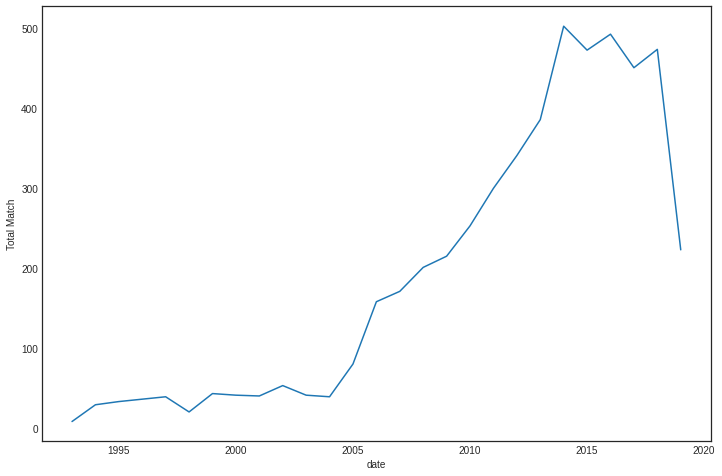

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(data =df.groupby('date').count()['R_fighter'].reset_index(),
             x='date',
             y='R_fighter'
             )
plt.ylabel('Total Match')
plt.show()

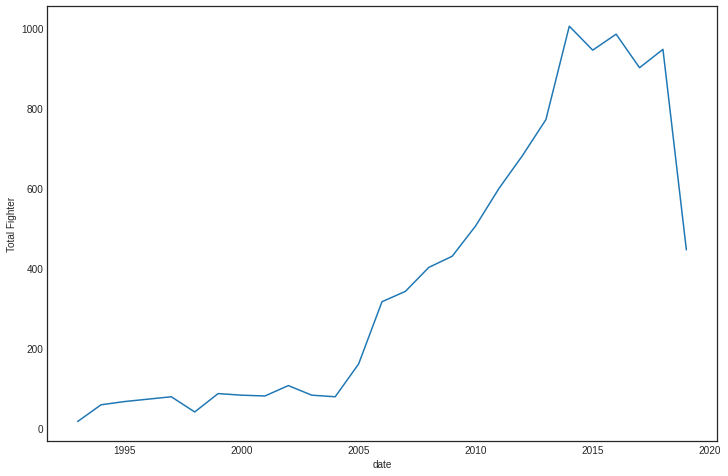

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(data =Match_info.groupby('date').count()['fighter'].reset_index(),
             x='date',
             y='fighter'
             )
plt.ylabel('Total Fighter')
plt.show()

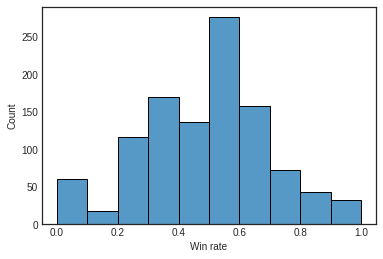

In [34]:
sns.histplot(data=fighter_sum1,
             x='Win rate',
             bins=10
             )

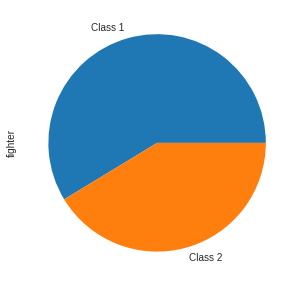

In [35]:
fighter_sum1.groupby('Win Class')['fighter'].count().plot.pie(figsize=(5,5))

Most players are in Win Class 1 with win rate <= 50%

In [36]:
fighter_sum1['Win rate'].median()

0.5

In [37]:
fighter_sum1.groupby('Experience')['fighter'].count()

Experience
Level 1    479
Level 2    335
Level 3    268
Name: fighter, dtype: int64

## Insights

Big question for this project: How to achieve win rate > 0.5 ?

So what factors can affect the win rate?


1.   Factors that cannot be improved: age, height, reach
2.   Factors that can be improved: experience, fighter skills.



In [38]:
# Merge 2 data frames Match_info1 and fighter_sum1 to get a general data frame
clean_df = pd.merge(Match_info1,
                     fighter_sum1,
                     on='fighter',
                     how='inner',
                     suffixes=('', '_y'))

In [39]:
clean_df.drop(columns='weight_class_y',inplace=True)

In [40]:
clean_df.head(5)

,index,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,...,Height_cms,Reach_cms,Weight_lbs,age,Win_Count,Total Win,Total Match,Win rate,Experience,Win Class
0,Blue,Marlon Moraes,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,167.6,170.2,135.0,31.0,0.0,4.0,6.0,0.67,Level 2,Class 2
1,Blue,Marlon Moraes,Jason Herzog,2019,"Fortaleza, Ceara, Brazil",Blue,False,Bantamweight,5,0.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
2,Blue,Marlon Moraes,Dan Miragliotta,2018,"Utica, New York, USA",Blue,False,Bantamweight,5,0.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
3,Blue,Marlon Moraes,Bill Bookwalter,2017,"Norfolk, Virginia, USA",Blue,False,Bantamweight,3,1.0,...,167.6,170.2,135.0,29.0,1.0,4.0,6.0,0.67,Level 2,Class 2
4,Blue,Marlon Moraes,Osiris Maia,2017,"Rio de Janeiro, Rio de Janeiro, Brazil",Red,False,Bantamweight,3,0.0,...,167.6,170.2,135.0,29.0,0.0,4.0,6.0,0.67,Level 2,Class 2


In [41]:
clean_df = clean_df[clean_df['avg_BODY_att'].notna()]

In [42]:
clean_df.head()

,index,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,...,Height_cms,Reach_cms,Weight_lbs,age,Win_Count,Total Win,Total Match,Win rate,Experience,Win Class
0,Blue,Marlon Moraes,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,167.6,170.2,135.0,31.0,0.0,4.0,6.0,0.67,Level 2,Class 2
1,Blue,Marlon Moraes,Jason Herzog,2019,"Fortaleza, Ceara, Brazil",Blue,False,Bantamweight,5,0.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
2,Blue,Marlon Moraes,Dan Miragliotta,2018,"Utica, New York, USA",Blue,False,Bantamweight,5,0.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
3,Blue,Marlon Moraes,Bill Bookwalter,2017,"Norfolk, Virginia, USA",Blue,False,Bantamweight,3,1.0,...,167.6,170.2,135.0,29.0,1.0,4.0,6.0,0.67,Level 2,Class 2
5,Red,Marlon Moraes,Mike Bell,2017,"Fresno, California, USA",Red,False,Bantamweight,3,0.0,...,167.6,170.2,135.0,29.0,1.0,4.0,6.0,0.67,Level 2,Class 2


#### Factors that cannot be improved: age, height, reach

In [43]:
color_win = ['navy','lavender']

Text(0.5, 1.0, 'Average Age by Win Class')

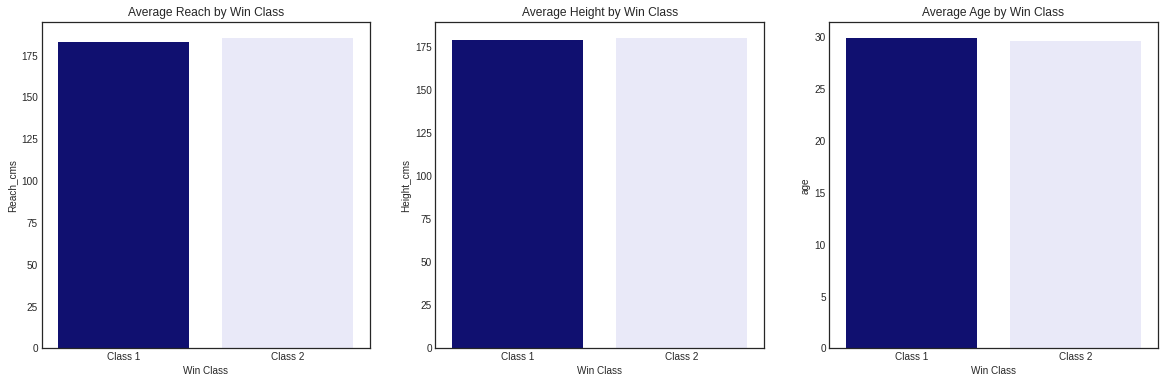

In [44]:

plt.figure(figsize=(20,6))

plt.subplot(131)
Reach_tb = clean_df.groupby('Win Class').mean()['Reach_cms'].reset_index()
sns.barplot(data=Reach_tb ,
            x="Win Class",
            y="Reach_cms",
            palette = color_win)
plt.title('Average Reach by Win Class')

plt.subplot(132)
Height_tb = clean_df.groupby('Win Class').mean()['Height_cms'].reset_index()
sns.barplot(data=Height_tb ,
            x="Win Class",
            y="Height_cms",
            palette = color_win)
plt.title('Average Height by Win Class')

plt.subplot(133)
Age_tb = clean_df.groupby('Win Class').mean()['age'].reset_index()
sns.barplot(data=Age_tb ,
            x="Win Class",
            y="age",
            palette = color_win)
plt.title('Average Age by Win Class')

There is **no difference** in reach, height, age between Win Class 1 and 2.

**=> Factors that cannot be improved do not affect the Win rate**

#### Factors that can be improved: experience, fighter skills.

##### Experience : Win rate increases with Experience level.

*Experience level: definition based on total number of matches and number of rounds*

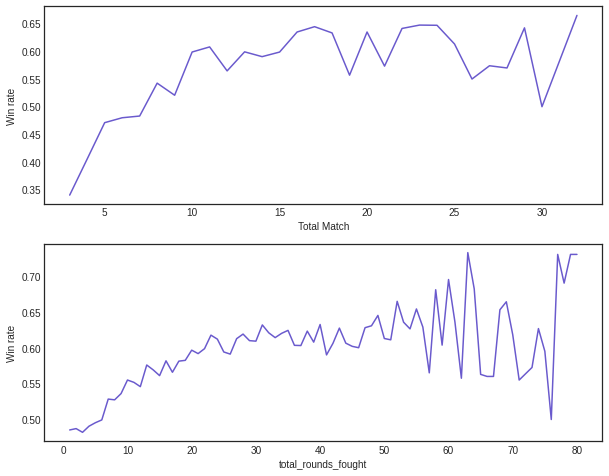

In [45]:
Match_tb = clean_df.groupby('Total Match').mean()['Win rate'].reset_index()
Round_tb = clean_df.groupby('total_rounds_fought').mean()['Win rate'].reset_index()
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.lineplot(data=Match_tb ,
            x="Total Match",
            y="Win rate",
            color = 'slateblue')

plt.subplot(212)
sns.lineplot(data=Round_tb ,
            x="total_rounds_fought",
            y="Win rate",
            color = 'slateblue')
plt.show()

Win rate tends to increase with Total Match and Total rounds fought.
Group fighters into 3 levels for analysis:
- Level 1: Total match <= 5.
- Level 2: Total match from 6 to 10.
- Level 3: Total match > 10.

Note : shown in data frame fighter_sum1 at Data preparation, column Experience.

In [46]:
color_ex = ['mistyrose','violet','darkviolet']

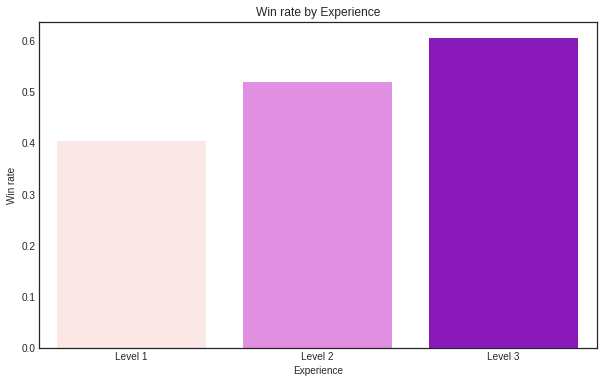

In [47]:
win_rate_ex = clean_df.groupby('Experience').mean()['Win rate'].reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=win_rate_ex,
            x="Experience",
            y="Win rate",
            palette = color_ex)
plt.title('Win rate by Experience')
plt.show()

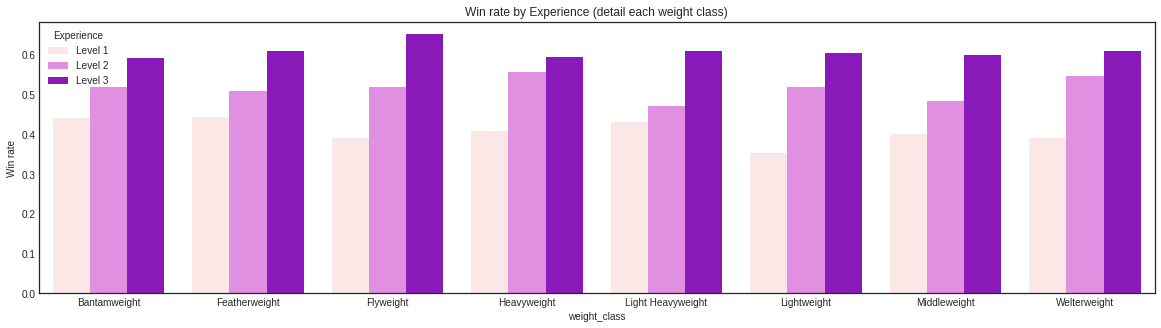

In [48]:
win_rate_total = clean_df[~clean_df['weight_class'].isin(['Catch Weight','Open Weight'])].groupby(['Experience','weight_class']).mean()['Win rate'].reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(data=win_rate_total,
            x="weight_class",
            y="Win rate",
            hue = 'Experience',
            palette = color_ex)
plt.title('Win rate by Experience (detail each weight class)')
plt.show()

By Experience :The win rate tends to increase from Level 1 to Level 3.

In detail by weight class, we also see the same trend.

Text(0.5, 1.0, 'Experience by Win Class')

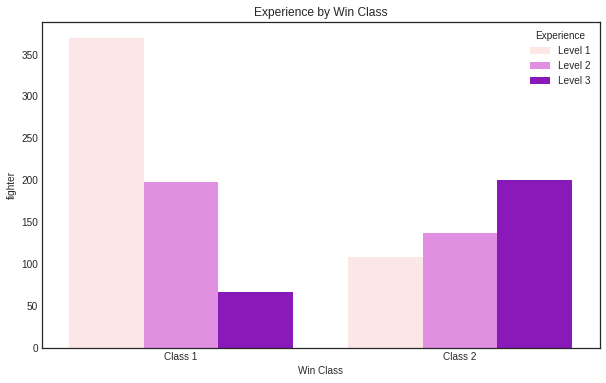

In [49]:
win_rate_class = clean_df.groupby(['Win Class','Experience'])['fighter'].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=win_rate_class,
            x="Win Class",
            y="fighter",
            hue = 'Experience',
            palette = color_ex)
plt.title('Experience by Win Class')

By Win Class : Win Class 1 focuses on Level 1 players, while Win Class 2 focuses on multiplayer Experience class 2,3

**Win rate increases with Experience level.**

**Fighter with win rate < 0.5 mostly at Level 1.**

##### How do Level 1 fighter increase their win rate?

Create data frames based on Experience level

In [50]:
# Take only the columns that show skills
clean_skill = clean_df[clean_df.columns[12:]]

In [51]:
clean_skill.head(20)

,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,...,Height_cms,Reach_cms,Weight_lbs,age,Win_Count,Total Win,Total Match,Win rate,Experience,Win Class
0,9.2,6.0,0.2,0.0,62.6,20.6,2.6,2.0,48.6,11.2,...,167.6,170.2,135.0,31.0,0.0,4.0,6.0,0.67,Level 2,Class 2
1,11.0,7.5,0.2,0.0,73.8,24.0,2.0,1.8,56.5,12.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
2,14.7,10.0,0.3,0.0,97.3,31.3,0.7,0.7,72.7,14.0,...,167.6,170.2,135.0,30.0,1.0,4.0,6.0,0.67,Level 2,Class 2
3,20.0,14.0,1.0,0.0,149.0,44.0,0.0,0.0,113.0,15.0,...,167.6,170.2,135.0,29.0,1.0,4.0,6.0,0.67,Level 2,Class 2
5,21.5,14.5,0.5,0.0,140.0,44.5,0.0,0.0,102.5,18.0,...,167.6,170.2,135.0,29.0,1.0,4.0,6.0,0.67,Level 2,Class 2
6,15.4,11.3,6.7,4.4,84.7,38.6,5.5,3.8,67.6,23.3,...,185.4,185.4,155.0,36.0,0.0,23.0,32.0,0.72,Level 3,Class 2
7,15.0,11.1,6.9,4.4,76.1,35.6,5.2,3.7,59.8,21.1,...,185.4,185.4,155.0,36.0,1.0,23.0,32.0,0.72,Level 3,Class 2
8,14.8,10.9,6.3,4.1,74.4,35.0,4.9,3.4,57.2,19.9,...,185.4,185.4,155.0,35.0,1.0,23.0,32.0,0.72,Level 3,Class 2
9,13.9,10.0,5.1,3.2,76.5,36.2,5.6,3.9,58.6,20.4,...,185.4,185.4,155.0,34.0,0.0,23.0,32.0,0.72,Level 3,Class 2
10,14.4,10.2,5.4,3.4,74.5,35.3,6.1,4.2,56.7,19.6,...,185.4,185.4,155.0,33.0,1.0,23.0,32.0,0.72,Level 3,Class 2


In [52]:
clean_skill = clean_skill[clean_skill['avg_BODY_att'].notna()]

In [53]:
clean_ex = clean_skill.groupby('Experience')[clean_skill.columns].mean()

In [54]:
clean_ex = clean_ex.T

In [55]:
clean_ex = clean_ex.T

In [56]:
clean_ex

,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,...,win_by_TKO_Doctor_Stoppage,wins,Height_cms,Reach_cms,Weight_lbs,age,Win_Count,Total Win,Total Match,Win rate
Experience,,,,,,,,,,,,,,,,,,,,,
Level 1,7.931623,5.553434,7.311170,4.920981,49.273358,17.944604,7.355321,4.878566,50.672302,18.009962,...,0.010566,1.035472,179.575774,183.178620,171.455094,29.047104,0.355849,1.647925,3.977358,0.404091
Level 2,8.517580,5.873493,7.603534,5.079203,54.740417,19.971953,8.715360,5.834844,56.086588,19.955324,...,0.026733,2.366108,179.730041,184.002424,171.587676,29.278082,0.502492,4.153149,7.881287,0.520100
Level 3,8.676761,6.144841,8.364236,5.665129,51.232316,18.600744,10.536905,6.886359,55.439782,20.203026,...,0.128224,5.852679,180.539137,185.669834,177.395089,30.216936,0.600446,10.691344,17.599206,0.605794


Add the Rate columns of each skill:

Rate = fighter / opponent

In [57]:
clean_ex['Body_att_rate']       = round(clean_ex['avg_BODY_att']/clean_ex['avg_opp_BODY_att'],2)
clean_ex['Body_landed_rate']    = round(clean_ex['avg_BODY_landed']/clean_ex['avg_opp_BODY_landed'],2)
clean_ex['CLINCH_att_rate']     = round(clean_ex['avg_CLINCH_att']/clean_ex['avg_opp_CLINCH_att'],2)
clean_ex['CLINCH_landed_rate']  = round(clean_ex['avg_CLINCH_landed']/clean_ex['avg_opp_CLINCH_landed'],2)
clean_ex['DISTANCE_att_rate']   = round(clean_ex['avg_DISTANCE_att']/clean_ex['avg_opp_DISTANCE_att'],2)
clean_ex['DISTANCE_laned_rate'] = round(clean_ex['avg_DISTANCE_landed']/clean_ex['avg_opp_DISTANCE_landed'],2)
clean_ex['GROUND_att_rate']     = round(clean_ex['avg_GROUND_att']/clean_ex['avg_opp_GROUND_att'],2)
clean_ex['GROUND_landed_rate']  = round(clean_ex['avg_GROUND_landed']/clean_ex['avg_opp_GROUND_landed'],2)
clean_ex['HEAD_att_rate']       = round(clean_ex['avg_HEAD_att']/clean_ex['avg_opp_HEAD_att'],2)
clean_ex['HEAD_landed_rate']    = round(clean_ex['avg_HEAD_landed']/clean_ex['avg_opp_HEAD_landed'],2)
clean_ex['SIG_STR_att_rate']    = round(clean_ex['avg_SIG_STR_att']/clean_ex['avg_opp_SIG_STR_att'],2)
clean_ex['SIG_STR_landed_rate'] = round(clean_ex['avg_SIG_STR_landed']/clean_ex['avg_opp_SIG_STR_landed'],2)
clean_ex['TD_att_rate']         = round(clean_ex['avg_TD_att']/clean_ex['avg_opp_TD_att'],2)
clean_ex['TD_landed_rate']      = round(clean_ex['avg_TD_landed']/clean_ex['avg_opp_TD_landed'],2)

In [58]:
clean_ex1 = clean_ex[clean_ex.columns[68:]]

In [59]:
clean_ex1

,Body_att_rate,Body_landed_rate,CLINCH_att_rate,CLINCH_landed_rate,DISTANCE_att_rate,DISTANCE_laned_rate,GROUND_att_rate,GROUND_landed_rate,HEAD_att_rate,HEAD_landed_rate,SIG_STR_att_rate,SIG_STR_landed_rate,TD_att_rate,TD_landed_rate
Experience,,,,,,,,,,,,,,
Level 1,0.95,0.95,0.99,0.99,0.99,0.99,0.93,0.92,1.00,1.01,0.98,0.98,0.95,0.96
Level 2,1.04,1.07,1.06,1.07,1.02,1.06,1.30,1.34,1.05,1.14,1.05,1.11,0.99,1.09
Level 3,1.15,1.22,1.21,1.28,1.05,1.13,1.72,1.80,1.14,1.32,1.13,1.26,1.10,1.43


In [60]:
clean_ex1 = clean_ex1.T

In [61]:
clean_ex1

Experience,Level 1,Level 2,Level 3
Body_att_rate,0.95,1.04,1.15
Body_landed_rate,0.95,1.07,1.22
CLINCH_att_rate,0.99,1.06,1.21
CLINCH_landed_rate,0.99,1.07,1.28
DISTANCE_att_rate,0.99,1.02,1.05
DISTANCE_laned_rate,0.99,1.06,1.13
GROUND_att_rate,0.93,1.30,1.72
GROUND_landed_rate,0.92,1.34,1.80
HEAD_att_rate,1.00,1.05,1.14
HEAD_landed_rate,1.01,1.14,1.32


In [62]:
sort_in = ['DISTANCE_laned_rate',
 'DISTANCE_att_rate',
 'SIG_STR_landed_rate',
 'SIG_STR_att_rate',
 'Body_landed_rate',
 'Body_att_rate',
 'HEAD_landed_rate',
 'HEAD_att_rate',
 'CLINCH_landed_rate',
 'CLINCH_att_rate',
 'TD_landed_rate',
 'TD_att_rate',
 'GROUND_landed_rate',
 'GROUND_att_rate']

In [63]:
clean_ex1 = clean_ex1.reindex(sort_in)

In [64]:
clean_ex1

Experience,Level 1,Level 2,Level 3
DISTANCE_laned_rate,0.99,1.06,1.13
DISTANCE_att_rate,0.99,1.02,1.05
SIG_STR_landed_rate,0.98,1.11,1.26
SIG_STR_att_rate,0.98,1.05,1.13
Body_landed_rate,0.95,1.07,1.22
Body_att_rate,0.95,1.04,1.15
HEAD_landed_rate,1.01,1.14,1.32
HEAD_att_rate,1.00,1.05,1.14
CLINCH_landed_rate,0.99,1.07,1.28
CLINCH_att_rate,0.99,1.06,1.21


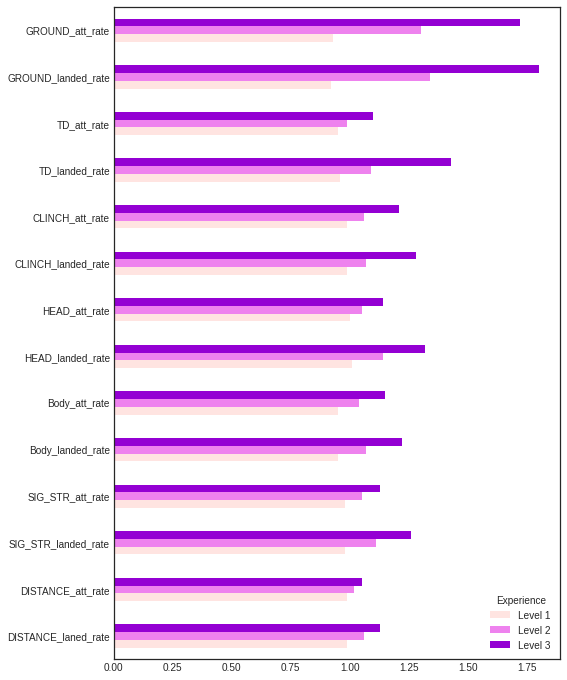

In [65]:
clean_ex1.plot.barh(figsize=(8,12),color=color_ex)

Looking at the chart above, we see that:

**-The rate tends to increase from fighter at Level 1 to level 3, which explains why the Win rate increases with the Experience level.**
 
**-Fighter at Level 1 has Rate for most skills < 1.0.**

**-The skill with the biggest difference between the 3 levels is Ground skill.**


In [66]:
clean_win = clean_skill.groupby('Win Class')[clean_skill.columns].mean()

In [67]:
clean_win = clean_win.T

In [68]:
clean_win = clean_win.T

In [69]:
clean_win['Body_att_rate']= round(clean_win['avg_BODY_att']/clean_win['avg_opp_BODY_att'],2)
clean_win['Body_landed_rate']= round(clean_win['avg_BODY_landed']/clean_win['avg_opp_BODY_landed'],2)
clean_win['CLINCH_att_rate']= round(clean_win['avg_CLINCH_att']/clean_win['avg_opp_CLINCH_att'],2)
clean_win['CLINCH_landed_rate']= round(clean_win['avg_CLINCH_landed']/clean_win['avg_opp_CLINCH_landed'],2)
clean_win['DISTANCE_att_rate']= round(clean_win['avg_DISTANCE_att']/clean_win['avg_opp_DISTANCE_att'],2)
clean_win['DISTANCE_laned_rate']= round(clean_win['avg_DISTANCE_landed']/clean_win['avg_opp_DISTANCE_landed'],2)
clean_win['GROUND_att_rate']= round(clean_win['avg_GROUND_att']/clean_win['avg_opp_GROUND_att'],2)
clean_win['GROUND_landed_rate']= round(clean_win['avg_GROUND_landed']/clean_win['avg_opp_GROUND_landed'],2)
clean_win['HEAD_att_rate']= round(clean_win['avg_HEAD_att']/clean_win['avg_opp_HEAD_att'],2)
clean_win['HEAD_landed_rate']= round(clean_win['avg_HEAD_landed']/clean_win['avg_opp_HEAD_landed'],2)
clean_win['SIG_STR_att_rate']= round(clean_win['avg_SIG_STR_att']/clean_win['avg_opp_SIG_STR_att'],2)
clean_win['SIG_STR_landed_rate']= round(clean_win['avg_SIG_STR_landed']/clean_win['avg_opp_SIG_STR_landed'],2)
clean_win['TD_att_rate'] = round(clean_win['avg_TD_att']/clean_win['avg_opp_TD_att'],2)
clean_win['TD_landed_rate']= round(clean_win['avg_TD_landed']/clean_win['avg_opp_TD_landed'],2)

In [70]:
clean_win

,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,...,DISTANCE_att_rate,DISTANCE_laned_rate,GROUND_att_rate,GROUND_landed_rate,HEAD_att_rate,HEAD_landed_rate,SIG_STR_att_rate,SIG_STR_landed_rate,TD_att_rate,TD_landed_rate
Win Class,,,,,,,,,,,,,,,,,,,,,
Class 1,8.070634,5.641709,7.568687,5.071231,50.270509,17.909454,7.602638,5.018279,51.499560,17.724655,...,0.99,0.98,0.94,0.95,0.98,0.97,0.98,0.97,0.86,0.83
Class 2,8.811758,6.194954,8.240685,5.576507,53.106553,19.595708,10.789635,7.107123,57.187785,21.216416,...,1.06,1.17,1.96,2.03,1.17,1.41,1.16,1.32,1.20,1.66


In [71]:
clean_win1 = clean_win[clean_win.columns[68:]]


In [72]:
clean_win1

,Body_att_rate,Body_landed_rate,CLINCH_att_rate,CLINCH_landed_rate,DISTANCE_att_rate,DISTANCE_laned_rate,GROUND_att_rate,GROUND_landed_rate,HEAD_att_rate,HEAD_landed_rate,SIG_STR_att_rate,SIG_STR_landed_rate,TD_att_rate,TD_landed_rate
Win Class,,,,,,,,,,,,,,
Class 1,0.99,0.98,0.99,0.99,0.99,0.98,0.94,0.95,0.98,0.97,0.98,0.97,0.86,0.83
Class 2,1.15,1.24,1.24,1.32,1.06,1.17,1.96,2.03,1.17,1.41,1.16,1.32,1.20,1.66


In [73]:
clean_win1= clean_win1.T

In [74]:
clean_win1

Win Class,Class 1,Class 2
Body_att_rate,0.99,1.15
Body_landed_rate,0.98,1.24
CLINCH_att_rate,0.99,1.24
CLINCH_landed_rate,0.99,1.32
DISTANCE_att_rate,0.99,1.06
DISTANCE_laned_rate,0.98,1.17
GROUND_att_rate,0.94,1.96
GROUND_landed_rate,0.95,2.03
HEAD_att_rate,0.98,1.17
HEAD_landed_rate,0.97,1.41


In [75]:
clean_win1 = clean_win1.reindex(sort_in)

In [76]:
clean_win1 

Win Class,Class 1,Class 2
DISTANCE_laned_rate,0.98,1.17
DISTANCE_att_rate,0.99,1.06
SIG_STR_landed_rate,0.97,1.32
SIG_STR_att_rate,0.98,1.16
Body_landed_rate,0.98,1.24
Body_att_rate,0.99,1.15
HEAD_landed_rate,0.97,1.41
HEAD_att_rate,0.98,1.17
CLINCH_landed_rate,0.99,1.32
CLINCH_att_rate,0.99,1.24


In [77]:
clean_win1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, DISTANCE_laned_rate to GROUND_att_rate
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Class 1  14 non-null     float64
 1   Class 2  14 non-null     float64
dtypes: float64(2)
memory usage: 336.0+ bytes


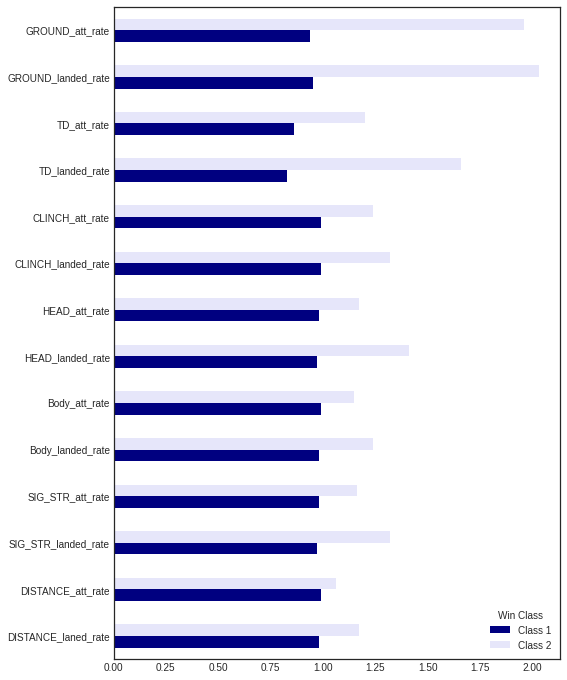

In [78]:
clean_win1.plot.barh(figsize=(8,12),color=color_win)

Similar to Experience, the Win Class chart shows that::

**-The rate tends to increase from fighter at Win Class 1 to Win Class 2.**
 
**-Fighter at Win Class has Rate for most skills < 1.0.**

**-The skill with the biggest difference between the 2 Class is Ground skill.**

So how to increase the win rate of Level 1 figher above 0.5 ?



In [92]:
# Create data frames with Experience Level 1 fighters
clean_ground = clean_df[clean_df['Experience']== 'Level 1'].groupby('fighter')[clean_df.columns].mean().reset_index()

In [93]:
clean_ground = clean_ground[['fighter','avg_GROUND_landed','avg_opp_GROUND_landed','Win rate']]

In [94]:
clean_ground

,fighter,avg_GROUND_landed,avg_opp_GROUND_landed,Win rate
0,Aaron Rosa,0.000000,5.500,0.33
1,Abdul Razak Alhassan,1.575000,3.975,0.80
2,Adam Milstead,1.333333,6.400,0.38
3,Adam Wieczorek,4.250000,12.000,0.67
4,Aiemann Zahabi,2.250000,2.500,0.33
...,...,...,...,...
474,Yui Chul Nam,20.250000,11.000,0.33
475,Yuki Kondo,14.250000,13.750,0.33
476,Zabit Magomedsharipov,13.200000,0.250,1.00
477,Zhang Lipeng,1.833333,7.100,0.50


In [95]:
clean_ground['GROUND_landed_rate']  = round(clean_ground['avg_GROUND_landed']/clean_ground['avg_opp_GROUND_landed'],2)

In [96]:
clean_ground = clean_ground[clean_ground['GROUND_landed_rate'].notna()]

In [97]:
clean_ground['avg_GROUND_landed'] = round(clean_ground['avg_GROUND_landed'],2)

<ipython-input-97-70dd43119c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ground['avg_GROUND_landed'] = round(clean_ground['avg_GROUND_landed'],2)


In [98]:
clean_ground['avg_opp_GROUND_landed'] = round(clean_ground['avg_opp_GROUND_landed'],2)

<ipython-input-98-b8131343a576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ground['avg_opp_GROUND_landed'] = round(clean_ground['avg_opp_GROUND_landed'],2)


In [99]:
clean_ground

,fighter,avg_GROUND_landed,avg_opp_GROUND_landed,Win rate,GROUND_landed_rate
0,Aaron Rosa,0.00,5.50,0.33,0.00
1,Abdul Razak Alhassan,1.58,3.98,0.80,0.40
2,Adam Milstead,1.33,6.40,0.38,0.21
3,Adam Wieczorek,4.25,12.00,0.67,0.35
4,Aiemann Zahabi,2.25,2.50,0.33,0.90
...,...,...,...,...,...
474,Yui Chul Nam,20.25,11.00,0.33,1.84
475,Yuki Kondo,14.25,13.75,0.33,1.04
476,Zabit Magomedsharipov,13.20,0.25,1.00,52.80
477,Zhang Lipeng,1.83,7.10,0.50,0.26


In [102]:
clean_ground['Ground Class'] = 'Class 1'
clean_ground.loc[clean_ground['GROUND_landed_rate'] > 0.7 ,'Ground Class'] = 'Class 2'
clean_ground.loc[clean_ground['GROUND_landed_rate'] > 3,'Ground Class'] = 'Class 3'

<ipython-input-102-e73a87364e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ground['Ground Class'] = 'Class 1'


In [103]:
clean_ground.groupby('Ground Class')['Win rate'].count()

Ground Class
Class 1    206
Class 2    125
Class 3    142
Name: Win rate, dtype: int64

Text(0.5, 1.0, 'Win rate by Ground Class')

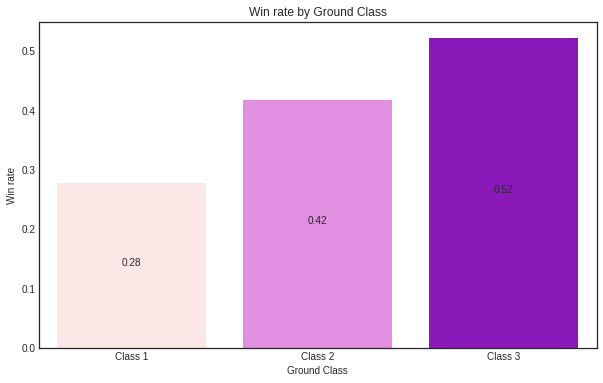

In [104]:
win_rate_ground = clean_ground.groupby('Ground Class')['Win rate'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=win_rate_ground,
            x="Ground Class",
            y="Win rate",
            palette=color_ex)
for i in range(win_rate_ground.shape[0]):
  plt.text(x=i,
           y=win_rate_ground.iloc[i,1]/2,
           s=f'{win_rate_ground.iloc[i,1]:.2f}',
           ha= 'center'
           )
plt.title('Win rate by Ground Class')

With experience level 1 fighter: to have a win rate > 0.5, the Ground rate needs to be greater than 3

## Conclusions:

-Factors that cannot be improved(Reach, Height, Age) do not affect the Win rate.

-Win rate increases with Experience level. Fighter with win rate < 0.5 mostly at Level 1.

-The skill rate (fighter / opponent) to increase from Level 1 to level 3 Experience fighter, which explains why the Win rate increases with the Experience level.

-Fighter at Level 1 has Rate for most skills < 1.0.

-The skill with the biggest difference between the 3 levels is Ground skill.

-To get a win rate > 0.5, a fighter at Experience Level 1 needs a Ground ratio greater than 3 ( neu chi uu tien focus de cai thien 1 ky nang, thi se la ground ratio(

Giai thich cac khai niem de tien theo doi.

Can suy nghi cach noi, ke giua cac doan duoc the hien 1 cach lien mach, di theo 1 luong la big question.

Conclusion : Link den BQ va conclusion theo BQ.

Target audience : Nhung nguoi moi tham gia va co ti le thang thap
Neu cac ban khong may nam trong nhoms nay, thi day co the la cau tra loi de giups ban thoat ra duoc.



## Export to Google Sheet for visualization on Tableau

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax 
import gspread
from google.auth import default
creds, _ = default()
from gspread_dataframe import set_with_dataframe

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('UFC_milestone_project')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):

    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 20000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'raw_data', df)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'Match_info', Match_info)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'fighter_sum', fighter_sum)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'clean_data', clean_df)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'wintb', clean_win1)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'extb', clean_ex1)
export_data_to_new_sheet('1QLsFZKFJYKACrFQF-CuXBNSoIT8kE0QB5l_2F9olI0k', 'groundtb', clean_ground)